<a href="https://colab.research.google.com/github/Alisher452/Alisher452/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22_%22%D0%A0%D0%90%D0%A1%D0%9F%D0%9E%D0%97%D0%9D%D0%90%D0%92%D0%90%D0%9D%D0%98%D0%95_%D0%97%D0%90%D0%A1%D0%AB%D0%9F%D0%90%D0%AE%D0%A9%D0%95%D0%93%D0%9E_%D0%92%D0%9E%D0%94%D0%98%D0%A2%D0%95%D0%9B%D0%AF%22_%D0%90%D0%91%D0%94%D0%90%D0%9B%D0%98%D0%95%D0%92_%D0%90_%D0%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DIPLOMA PROJECT - "RECOGNITION OF A FALLING ASLEEP DRIVER"

PERFORMER : ABDALIEV ALISHER JABBAROVICH



---



ДИПЛОМНЫЙ ПРОЕКТ - "РАСПОЗНАВАНИЕ ЗАСЫПАЮЩЕГО ВОДИТЕЛЯ"

ИСПОЛНИТЕЛЬ : АБДАЛИЕВ АЛИШЕР ЖАББАРОВИЧ

---



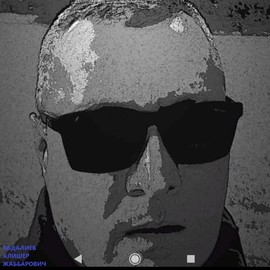

<h1><b>Загрузка библиотек</b></h1>

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
try:
  %tensorflow_version only exists in Colab.
  !pip install tf-nightly-gpu-2.0-preview
except Exception:
  pass
import tensorflow as tf

Unknown TensorFlow version: only exists in Colab.
Currently selected TF version: 2.x
Available versions:
 * 1.x
 * 2.x
ERROR: Could not find a version that satisfies the requirement tf-nightly-gpu-2.0-preview (from versions: none)
ERROR: No matching distribution found for tf-nightly-gpu-2.0-preview


In [ ]:
import shutil
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense

In [ ]:
from tensorflow.keras.optimizers import Adam, RMSprop # Импортируем оптимизатор
from tensorflow.keras import datasets, callbacks, preprocessing
from tensorflow.keras.initializers import RandomNormal #Импортируем слой инициализации весов с номральным распределением
from tensorflow.keras.models import Model, Sequential # Импортируем модели keras: Model
from tensorflow.keras.layers import Conv2D, ZeroPadding2D, Dropout, UpSampling2D, Cropping2D, Conv2DTranspose,Input, LeakyReLU, Reshape, Activation, Concatenate, BatchNormalization, Flatten, Dense # Импортируем стандартные слои keras
from tensorflow.keras.utils import plot_model # функция для отрисовки структуры модели
from tensorflow.keras.preprocessing import image # модуль для отрисовки изображения
from tensorflow.keras import backend ## устанавливаем Keras backend
from PIL import Image, ImageDraw, ImageFont # Модули работы с изображениями
from PIL import Image, ImageDraw, ImageFont # Модули работы с изображениямиfrom PIL import Image, ImageDraw, ImageFon
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
import os # Загружаем бибилотеку для работы с файлами
import keras.backend as K  # импортируем Keras backend
import glob # Модуль для нахождения путей файлов
import zipfile # Библиотека для работы с архивами
import random
import gdown
from random import shuffle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


DATA PREPARATION

Let's load the database of faces of two classes (Faces of people with open eyes and with closed eyes). The dataset consists of 1003 images .



---



<h1><b>Подготовка данных </b></h1>

Загрузим базу лиц двух классов(Лица людей с открытыми глазами и с закрытыми глазами). Датасет состоит из 1003 изображений .

In [ ]:
!unzip -q '/content/drive/MyDrive/base/train.zip' -d '/content/train1'

Preparing data for face recognition in images.

The data is divided into three directories:

1). train (training data)

2). val (data for verification)

3).test (data for testing)

Two subdirectories are created in each directory, according to the class names: Open and Closed.

The images are rewritten from the original directory to the new structure.80% of images are used for training, 10% for testing, and 10% for testing.

Before launching, you need to download a set of Open and Closed images and unpack it.



---



Подготовка данных для распознавания лиц на изображениях.

Данные разбиваются на три каталога:

1). train (данные для обучения)

2). val (данные для проверки)

3).test (данные для тестирования)

В каждом каталоге создаются по два подкаталога, в соответсвии с названиями классов: Open и Closed.

Изображения переписываются из исходного каталога в новую структуру.Для обучения используется 80% изображений, для проверки - 15%, для тестрования также 15%.

Перед запуском необходимо скачать набор изображений Open и Closed и распаковать его.


In [ ]:
# Задание глобальных значений
IMG_WIDTH = 75
IMG_HEIGHT = 75
IMAGE_SHAPE = (IMG_HEIGHT, IMG_WIDTH, 3)
BATCH_SIZE = 256
NOISE_DIM = 512
data_dir = '/content/train1/train/'
NUMPY_DIR = '/content/numpy_dataset/'
# Каталог с набором данных
data_dir = '/content/train1/train/'
# Каталог с данными для обучения
train_dir = '/content/train/'
# Каталог с данными для проверки
val_dir = '/content/val/'
# Каталог с данными для тестирования
test_dir = '/content/test/'
# Часть набора данных для тестирования
test_data_portion = 0.15
# Часть набора данных для проверки
val_data_portion = 0.15
# Количество элементов данных в одном классе
nb_images = 500
# Функция создания каталога с двумя подкаталогами по названию классов: eyes_open  и eyes_closed


In [ ]:
# Папка с данными
print(f'Размер базы: {len(os.listdir(data_dir))} изображений')

Размер базы: 1003 изображений


In [ ]:
def create_directory(dir_name):
    if os.path.exists(dir_name):
        shutil.rmtree(dir_name)
    os.makedirs(dir_name)
    os.makedirs(os.path.join(dir_name, "Open"))
    os.makedirs(os.path.join(dir_name, "Closed"))
# Создание структуры каталогов для обучающего, проверочного и тестового набора данных

In [ ]:
create_directory(train_dir)
create_directory(val_dir)
create_directory(test_dir)
# Функция копирования изображений в заданный каталог. Изображения лиц(спящих и не спящих) копируются в отдельные подкаталоги

In [ ]:
def copy_images(start_index, end_index, source_dir, dest_dir):
    for i in range(start_index, end_index):
        shutil.copy2(os.path.join(source_dir, "Open." + str(i+1) + ".JPG"),
                    os.path.join(dest_dir, "Open"))
        shutil.copy2(os.path.join(source_dir, "Closed." + str(i+1) + ".JPG"),
                   os.path.join(dest_dir, "Closed"))
# Расчет индексов наборов данных для обучения, проверки и тестирования

In [ ]:
start_val_data_idx = int(nb_images * (1 - val_data_portion - test_data_portion))
start_test_data_idx = int(nb_images * (1 - test_data_portion))
print(start_val_data_idx)
print(start_test_data_idx)
# Копирование изображений

350
425


In [ ]:
copy_images(0, start_val_data_idx, data_dir, train_dir)
copy_images(start_val_data_idx, start_test_data_idx, data_dir, val_dir)
copy_images(start_test_data_idx, nb_images, data_dir, test_dir)

In [ ]:
# Каталог с данными для обучения
train_dir = 'train'
# Каталог с данными для проверки
val_dir = 'val'
# Каталог с данными для тестирования
test_dir = 'test'
# Размеры изображения
img_width, img_height = 75, 75
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 3)
# Количество эпох
epochs = 50
# Размер мини-выборки
batch_size = 4
# Количество изображений для обучения
nb_train_samples = 700
# Количество изображений для проверки
nb_validation_samples = 150
# Количество изображений для тестирования
nb_test_samples = 150

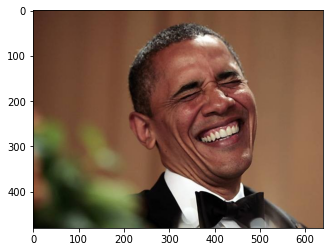

In [ ]:
model_image_size = img_width, img_height # Размер входных данных
image = Image.open('/content/train1/train/Closed.100.JPG') # Загружаем изображение
plt.imshow (image) # Выводим изображение

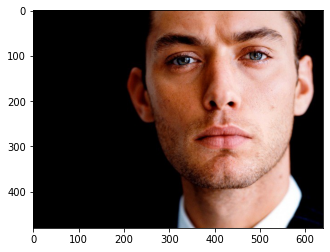

In [ ]:
model_image_size = img_width, img_height # Размер входных данных
image = Image.open('/content/train1/train/Open.120.JPG') # Загружаем изображение
plt.imshow (image) # Выводим изображение



---



---



CREATING A CONVOLUTIONAL NEURAL NETWORK

NETWORK ARCHITECTURE

Convolution layer, core size 3x3, number of feature maps - 32 pcs., ReLU activation function.

Subsampling layer, selecting the maximum value from a 2x2 square

Convolution layer, core size 3x3, number of feature maps - 32 pcs., ReLU activation function.

Subsampling layer, selecting the maximum value from a 2x2 square

Convolution layer, core size 3x3, number of feature maps - 64 pcs., ReLU activation function.

Subsampling layer, selecting the maximum value from a 2x2 square

Transformation layer from two-dimensional to one-dimensional representation

Fully connected layer, 64 neurons, ReLU activation function.

Dropout layer.

Output layer, 1 neuron, sigmoid activation functions

Layers 1 through 6 are used to highlight important features in the image, and layers 7 through 10 are used for classification.



---



СОЗДАЕМ СВЕРТОЧНУЮ НЕЙРОННУЮ СЕТЬ

АРХИТЕКТУРА СЕТИ

Слой свертки, размер ядра 3х3, количество карт признаков - 32 шт., функция активации ReLU.

Слой подвыборки, выбор максимального значения из квадрата 2х2

Слой свертки, размер ядра 3х3, количество карт признаков - 32 шт., функция активации ReLU.

Слой подвыборки, выбор максимального значения из квадрата 2х2

Слой свертки, размер ядра 3х3, количество карт признаков - 64 шт., функция активации ReLU.

Слой подвыборки, выбор максимального значения из квадрата 2х2

Слой преобразования из двумерного в одномерное представление

Полносвязный слой, 64 нейрона, функция активации ReLU.

Слой Dropout.

Выходной слой, 1 нейрон, функция активации sigmoid

Слои с 1 по 6 используются для выделения важных признаков в изображении, а слои с 7 по 10 - для классификации.

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
# Компилируем нейронную сеть

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 700 images belonging to 2 classes.


In [ ]:
val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 150 images belonging to 2 classes.


In [ ]:
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 150 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


175/175 [==============================] - 6s 31ms/step - loss: 0.6984 - accuracy: 0.4900 - val_loss: 0.6899 - val_accuracy: 0.6081
Epoch 2/50
175/175 [==============================] - 5s 31ms/step - loss: 0.6959 - accuracy: 0.5129 - val_loss: 0.6930 - val_accuracy: 0.5068
Epoch 3/50
175/175 [==============================] - 5s 31ms/step - loss: 0.6940 - accuracy: 0.4800 - val_loss: 0.6922 - val_accuracy: 0.5405
Epoch 4/50
175/175 [==============================] - 5s 31ms/step - loss: 0.7004 - accuracy: 0.5243 - val_loss: 0.7006 - val_accuracy: 0.4257
Epoch 5/50
175/175 [==============================] - 5s 29ms/step - loss: 0.6947 - accuracy: 0.5157 - val_loss: 0.6951 - val_accuracy: 0.5000
Epoch 6/50
175/175 [==============================] - 5s 31ms/step - loss: 0.6776 - accuracy: 0.6057 - val_loss: 0.6980 - val_accuracy: 0.5473
Epoch 7/50
175/175 [==============================] - 5s 31ms/step - loss: 0.6536 - accuracy: 0.6129 - val_loss: 0.6722 - val_accuracy: 0.5811
Epoch 8/50

In [ ]:
scores = model.evaluate_generator(test_generator, nb_test_samples // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
print("Accuracy on test data: %.2f%%" % (scores[1]*100))
print("Аккуратность на тестовых данных: %.2f%%" % (scores[1]*100))

Accuracy on test data: 70.95%
Аккуратность на тестовых данных: 70.95%


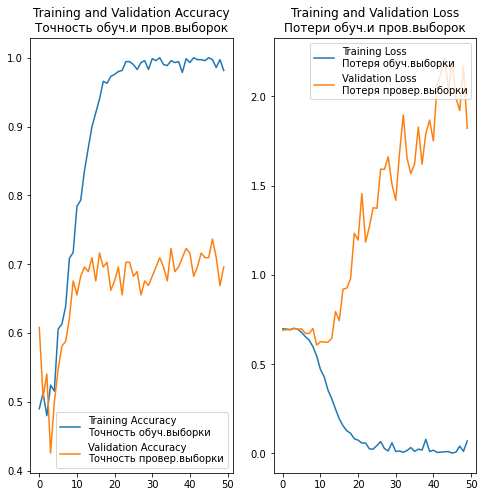

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy\nТочность обуч.выборки')
plt.plot(epochs_range, val_acc, label='Validation Accuracy\nТочность провер.выборки')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy\nТочность обуч.и пров.выборок')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss\nПотеря обуч.выборки')
plt.plot(epochs_range, val_loss, label='Validation Loss\nПотеря провер.выборки')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss\nПотери обуч.и пров.выборок')
plt.show()

In [ ]:
# Уменьшив размер минивыборки и размер подаваемого изображения удалось повысить точность на 6%